# Tutorial 3: Introduction to Keras


Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 

Here we are going to use Keras on the top of TensorFlow.

**1. Keras Model creation-** The core data structure of Keras is a model, a way to organize layers. The simplest type of model is the Sequential model, a linear stack of layers. 

from keras.models import Sequential

model = Sequential()

**2. Adding layers to model** - Stacking layers is as easy as .add():


from keras.layers import Dense

model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))

**3. Model Compilation -**configure model learning process with .compile()

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

**4. Model Training -** To iterate on training data in batches.

model.fit(x_train, y_train, epochs=5, batch_size=32)

**5. Evaluate model performance -**

model.evaluate(x_test, y_test, batch_size=128)

**6. Predict output on new data -**

classes = model.predict(x_test, batch_size=128)

# Practice Problem -

**We are going to use House value prediction dataset https://www.kaggle.com/c/zillow-prize-1/data and our objective is to determine whether the house price is above or below the median**

### A.  Preprocessing

**A.1 - Reading the data file** 

In [2]:
import pandas as pd
df = pd.read_csv('housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [3]:
df.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

**A2. - Fetching only the values from data**

In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

**A3. - Seperating the input vector and target output**

In [6]:
X = dataset[:,0:10]
Y = dataset[:,10]

**A4. - Data normalization**

In [7]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

**A4. - Splitting the data into training, validation and testing**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)

In [9]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [10]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1168, 10) (146, 10) (146, 10) (1168,) (146,) (146,)


### B. Model Building

**B1. Import the required library**

In [11]:
from keras.models import Sequential
from keras.layers import Dense

**B2. Create model and adding layers**

In [12]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                176       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


**B3. Model Compilation**

In [13]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### C. Training and Testing

**C1. Training the model**

In [14]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=30,
          validation_data=(X_val, Y_val))

Epoch 1/30
37/37 [==============================] - 0s 6ms/step - loss: 0.7358 - accuracy: 0.4966 - val_loss: 0.7310 - val_accuracy: 0.5000
Epoch 2/30
37/37 [==============================] - 0s 620us/step - loss: 0.7133 - accuracy: 0.4966 - val_loss: 0.7135 - val_accuracy: 0.4932
Epoch 3/30
37/37 [==============================] - 0s 593us/step - loss: 0.7021 - accuracy: 0.4940 - val_loss: 0.7037 - val_accuracy: 0.4795
Epoch 4/30
37/37 [==============================] - 0s 594us/step - loss: 0.6961 - accuracy: 0.4932 - val_loss: 0.6983 - val_accuracy: 0.4863
Epoch 5/30
37/37 [==============================] - 0s 596us/step - loss: 0.6930 - accuracy: 0.4949 - val_loss: 0.6954 - val_accuracy: 0.4589
Epoch 6/30
37/37 [==============================] - 0s 620us/step - loss: 0.6910 - accuracy: 0.5394 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/30
37/37 [==============================] - 0s 593us/step - loss: 0.6893 - accuracy: 0.5625 - val_loss: 0.6914 - val_accuracy: 0.5548
Epoch 8/

In [15]:
test_evaluate =model.evaluate(X_test, Y_test)
print("Testing Accuracy :"+ str(test_evaluate[1]*100))
print("Testing Loss :"+ str(test_evaluate[0]))

5/5 [==============================] - 0s 395us/step - loss: 0.6184 - accuracy: 0.6781
Testing Accuracy :67.80821681022644
Testing Loss :0.6184305548667908


**C3. Saving the Model**

In [16]:
from keras.models import load_model
model.save('my_model.h5')
model.save_weights('my_model_weights.h5')

### D. Plotting the batchwise training and validation

**D1. Loss Plot**

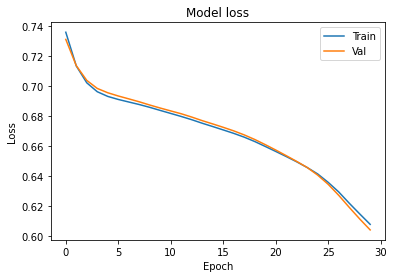

In [17]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

**D2. Accuracy Plot** 

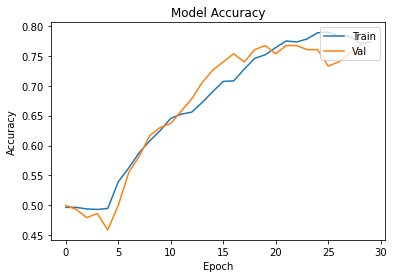

In [19]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Exercise.1

**You have to load the weights of the saved model and then add one more layer Dense layer with 8 neuron then check the performance of the model.**

**Reference:** - https://keras.io/